## 1. Data preprocessing

<StemContainer object of 3 artists>

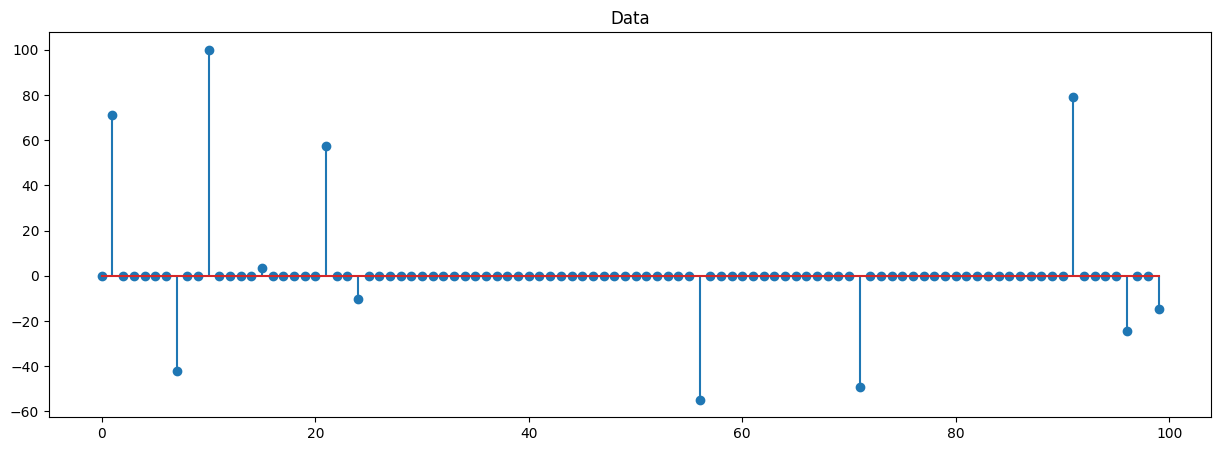

In [295]:
#Task 1.1 generating the data
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200289 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30

# Task 1.2 plotting the generated data(signal)
signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


min of data -54.851148019388 max of data 100.0
No. of non-zero elements in signal: 11
No. of non-zero elements in min-max-scaled: 99


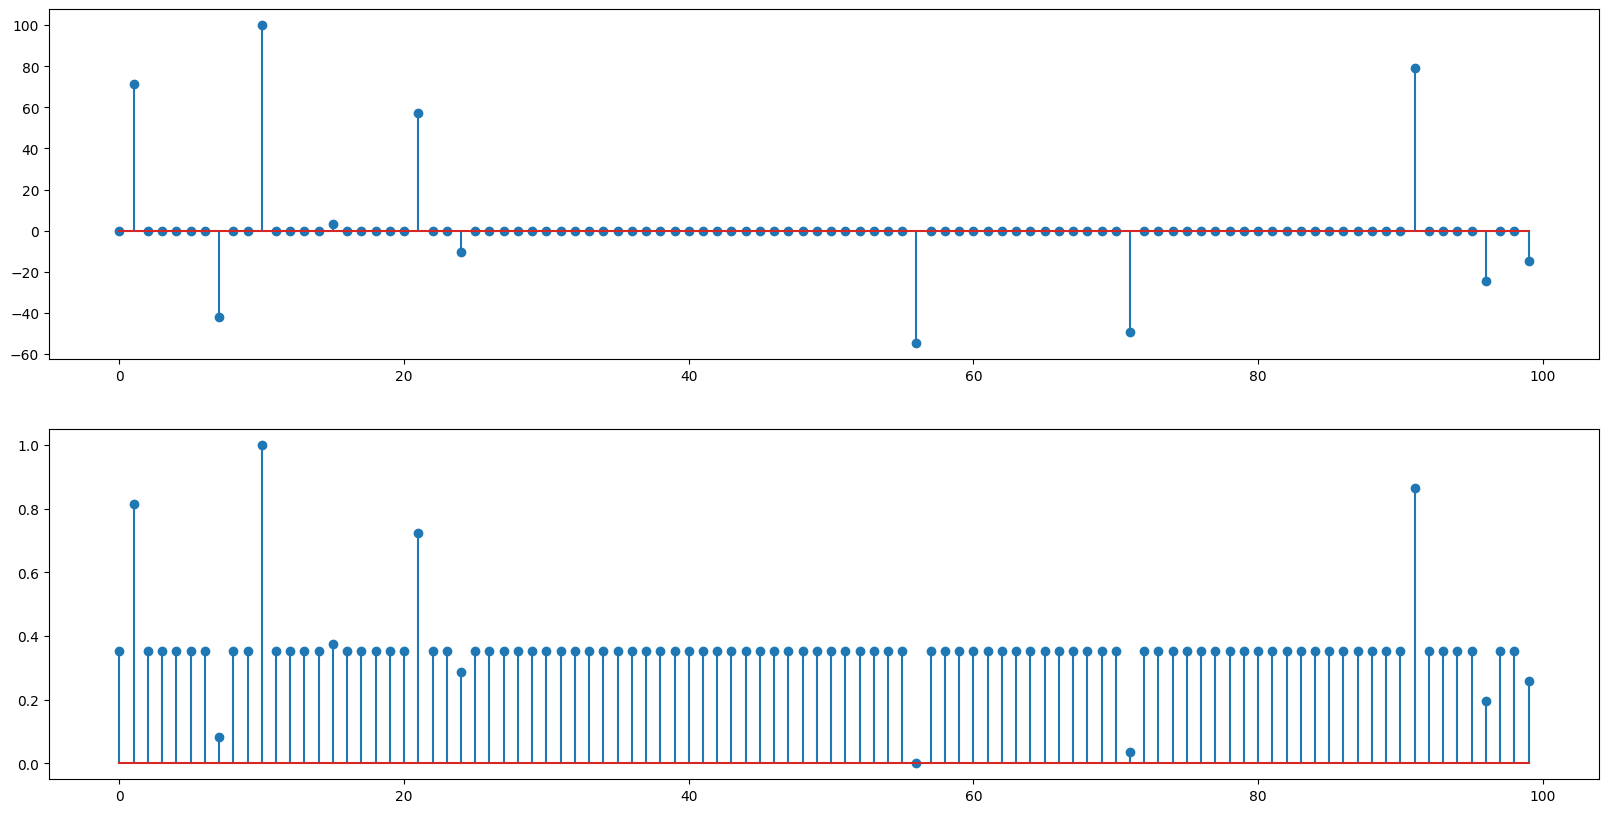

In [296]:
# Task 1.3 applying normalization methods

# Min Max scaler
def min_max_scale(data):
    min_val = np.min(data)
    max_val = np.max(data)
    print("min of data", min_val, "max of data", max_val)
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

scaled_data_min_max = min_max_scale(signal)
f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)
ax[1].stem(scaled_data_min_max)

# Counting non-zero elements
print("No. of non-zero elements in signal:",np.count_nonzero(signal))
print("No. of non-zero elements in min-max-scaled:",np.count_nonzero(scaled_data_min_max))

No. of non-zero elements in signal: 11
No. of non-zero elements in min-max-scaled: 11


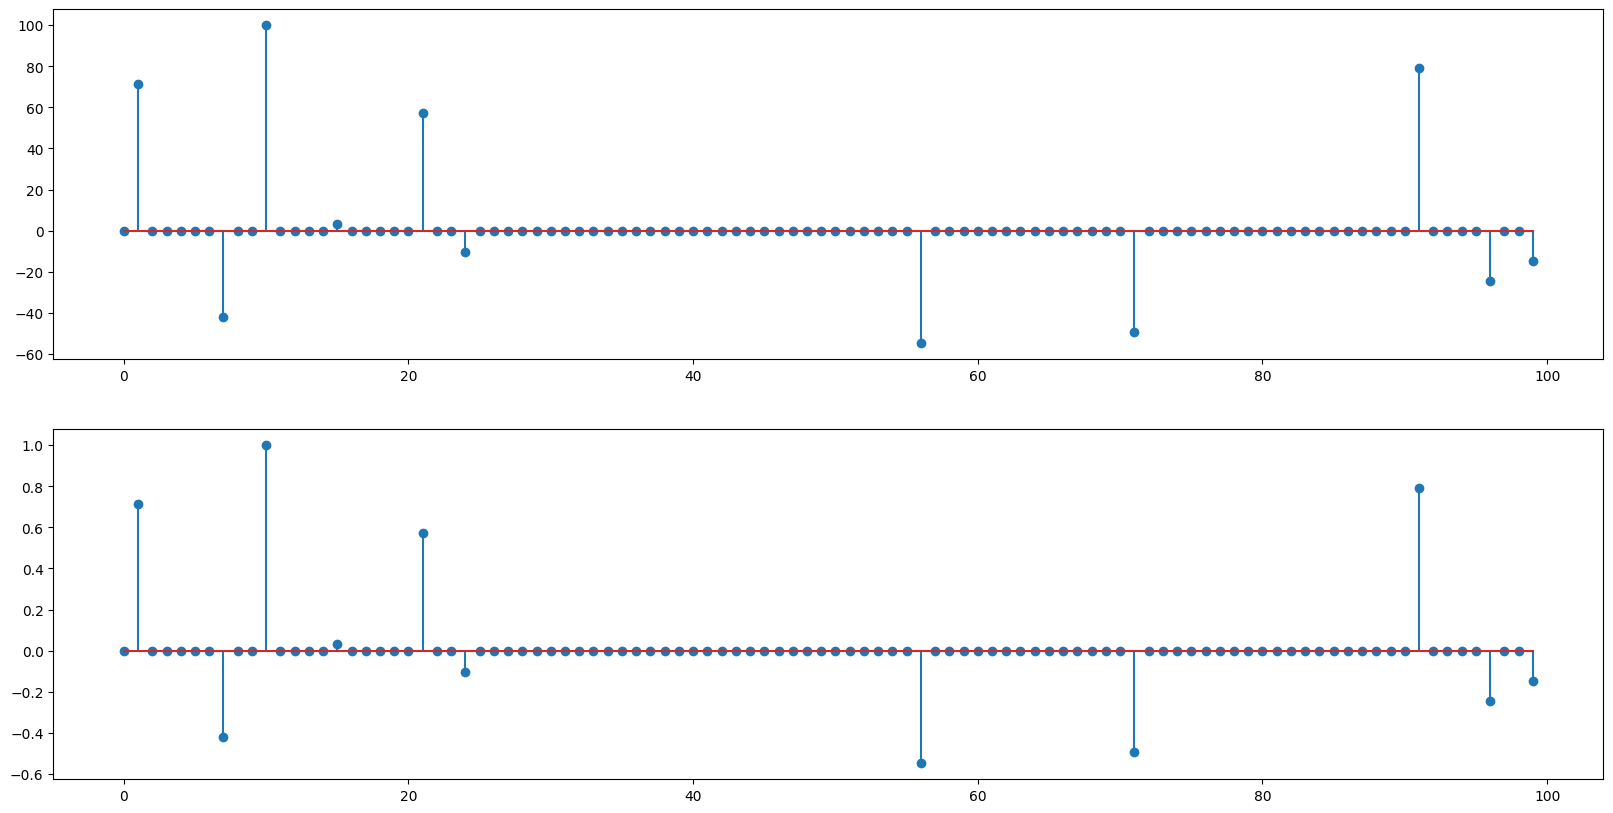

In [297]:
# MaxAbsScaler
import sklearn
from sklearn import preprocessing

max_scaled = preprocessing.MaxAbsScaler().fit_transform(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)
ax[1].stem(max_scaled)

# Counting non-zero elements
print("No. of non-zero elements in signal:",np.count_nonzero(signal))
print("No. of non-zero elements in min-max-scaled:",np.count_nonzero(max_scaled))

No. of non-zero elements in signal: 11
No. of non-zero elements in min-max-scaled: 100


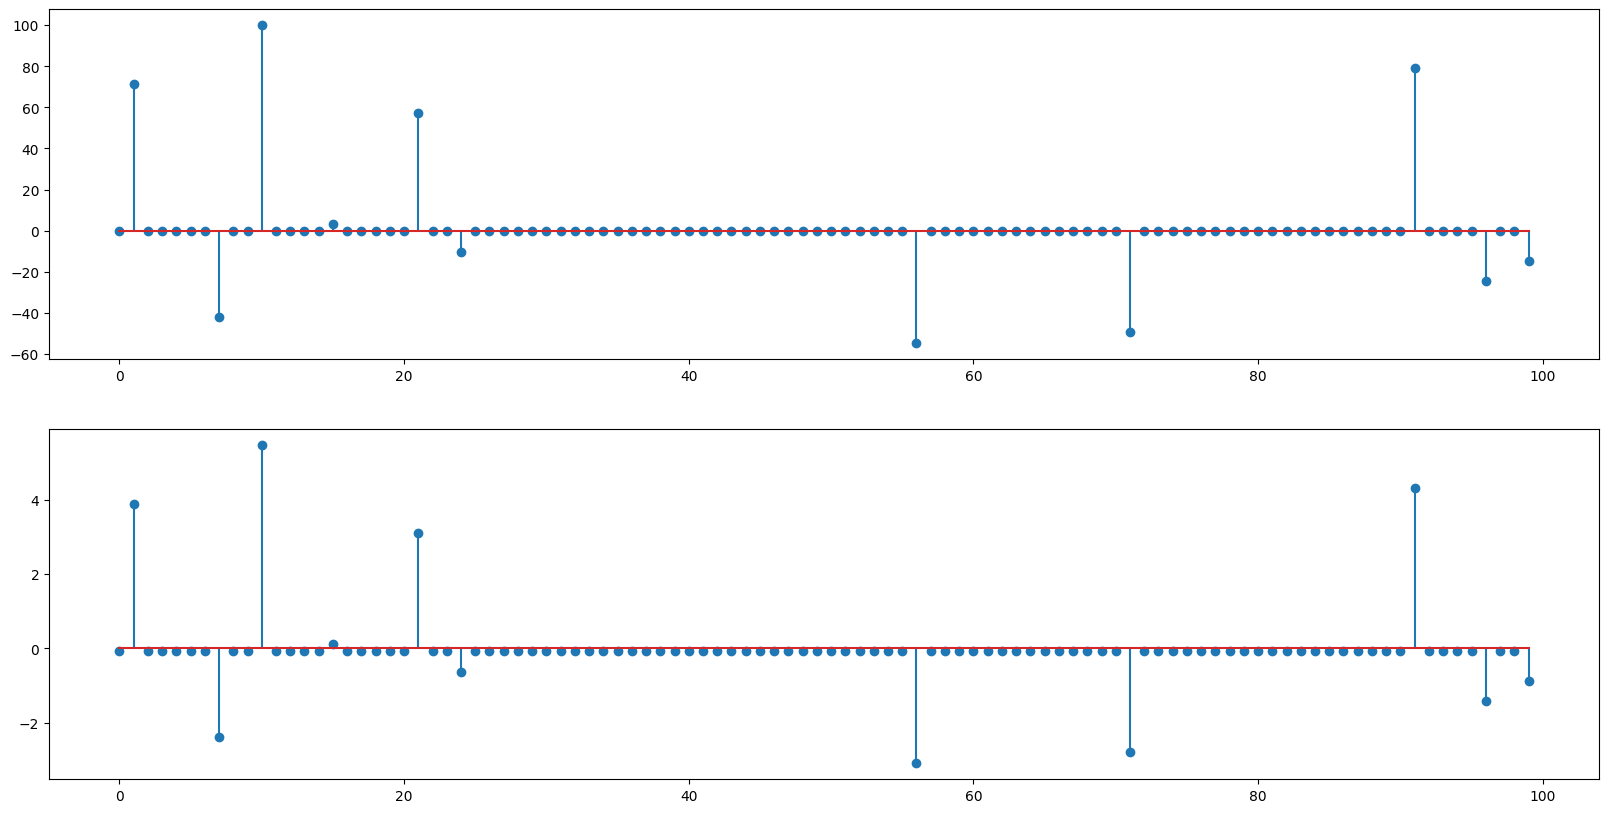

In [298]:
# Standard normalization 
def standard_normalization(data):
    mean = np.mean(data)
    stan_deviation = np.std(data)
    x_normalized = (data - mean)/stan_deviation
    return x_normalized

standard_normalized_data = standard_normalization(signal)

f, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].stem(signal)
ax[1].stem(standard_normalized_data)

# Counting non-zero elements
print("No. of non-zero elements in signal:",np.count_nonzero(signal))
print("No. of non-zero elements in min-max-scaled:",np.count_nonzero(standard_normalized_data))

## 2. Linear regression on real world data

In [299]:
# Task 2.1 loading the data
import pandas as pd

# printing data head
df = pd.read_csv("Advertising.csv")
print(df.head())
print()

# Seperating independent variables
X = df.iloc[:,1:4]
print(X.head())
print()

# Seperating dependent variables
y = df.iloc[:,4]
print(y.head())
print()

   sample index     TV  radio  newspaper  sales
0             1  230.1   37.8       69.2   22.1
1             2   44.5   39.3       45.1   10.4
2             3   17.2   45.9       69.3    9.3
3             4  151.5   41.3       58.5   18.5
4             5  180.8   10.8       58.4   12.9

      TV  radio  newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64



In [300]:
# Task 2.2
from sklearn.model_selection import train_test_split

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 3)
(40, 3)
(160,)
(40,)


In [301]:
# Task 2.3
from sklearn.linear_model import LinearRegression

# Training a regression model
model = LinearRegression()
model.fit(X_train,y_train)
coef_tv = model.coef_[0]           # coefficient of TV
coef_radio = model.coef_[1]         # coefficient of radio
coef_newspaper = model.coef_[2]     # coefficient of newspaper

# Printing the value of intercept
print("Intercept:",model.intercept_)

# Print the coefficients
print("Coefficient for TV:", coef_tv)
print("Coefficient for Radio:", coef_radio)
print("Coefficient for Newspaper:", coef_newspaper)

Intercept: 2.979067338122629
Coefficient for TV: 0.044729517468716326
Coefficient for Radio: 0.18919505423437652
Coefficient for Newspaper: 0.0027611143413671935


In [302]:
# Task 2.4
from scipy.stats import sem
# Making prediction on train and  test dataset
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating RSS
RSS_train = np.sum((y_train - y_pred_train)**2)
RSS_test = np.sum((y_test - y_pred_test)**2)
print("RSS for train data:",RSS_train)
print("RSS for test data:",RSS_test)
print()

# Calculating RSE
N_train = len(X_train)
d = X_train.shape[1] + 1
RSE_train = np.sqrt(RSS_train / (N_train - d))
print("RSE for train data:",RSE_train)

N_test = len(X_test)
d = X_test.shape[1] + 1
RSE_test = np.sqrt(RSS_test / (N_test - d))
print("RSE for test data:",RSE_test)
print()

# Calculating MSE
MSE_train = RSS_train/N_train
MSE_test = RSS_test/N_test
print("Mean Squared Error:",MSE_train)
print("Mean Squared Error:",MSE_test)
print()

# Calculating R**2 statistic
TSS_train = np.sum((y_train - np.mean(y_train))**2)
TSS_test = np.sum((y_test - np.mean(y_test))**2)
R2_train = 1 - (RSS_train/TSS_train)
R2_test = 1 - (RSS_test/TSS_test)
print("R2 for train:",R2_train)
print("R2 for test:",R2_test)


RSS for train data: 432.8207076930262
RSS for test data: 126.96389415904413

RSE for train data: 1.6656805564035793
RSE for test data: 1.8779709363435915

Mean Squared Error: 2.705129423081414
Mean Squared Error: 3.1740973539761033

R2 for train: 0.8957008271017818
R2 for test: 0.899438024100912


In [303]:
import statsmodels.api as sm
X_train = sm.add_constant(X_train)  # Add a constant (intercept) term
model_sm = sm.OLS(y_train, X_train).fit()
se = model_sm.bse

# Calculating standard errors
bse = model_sm.bse
print("\nStandard error for each feature")
print(bse,'\n')

# Calculating t-values
t_values = model_sm.tvalues
print("t-values for each feature")
print(t_values,'\n')

# Calculating p-values
p_values = model_sm.pvalues
print("p-values for each feature")
print(p_values)


Standard error for each feature
const        0.353517
TV           0.001567
radio        0.009693
newspaper    0.007048
dtype: float64 

t-values for each feature
const         8.426953
TV           28.543587
radio        19.517950
newspaper     0.391761
dtype: float64 

p-values for each feature
const        2.202287e-14
TV           8.166150e-64
radio        1.016134e-43
newspaper    6.957694e-01
dtype: float64


The R2 statistic value is 0.8994. That means it is close to 1. Therefore there is a relationship between the adevertising budgets and the sales.

Coefficient for TV: 0.044729517468716326
Coefficient for Radio: 0.18919505423437652
Coefficient for Newspaper: 0.0027611143413671935 
When looking at the absolute values of the coefficients corresponding to each feature, advertising budget of radio is higher. Therefore independent variable radio contribute more on sales.

In [304]:
# Task 2.7
data = pd.DataFrame({
    'TV': [25, 50, 0],
    'radio': [25, 0, 50],
    'newspaper': [0, 0, 0],
})

In [305]:
y_pred = model.predict(data)
print('Spending $25000 for each TV and radio:',y_pred[0])
print('Spending $50000 for TV:',y_pred[1])
print('Spending $50000 for radio:',y_pred[2])

Spending $25000 for each TV and radio: 8.82718163069995
Spending $50000 for TV: 5.215543211558446
Spending $50000 for radio: 12.438820049841455


## 3. Linear regression impact on outliers

In [306]:
# Task 3.1
xi = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
yi = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])
xi

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

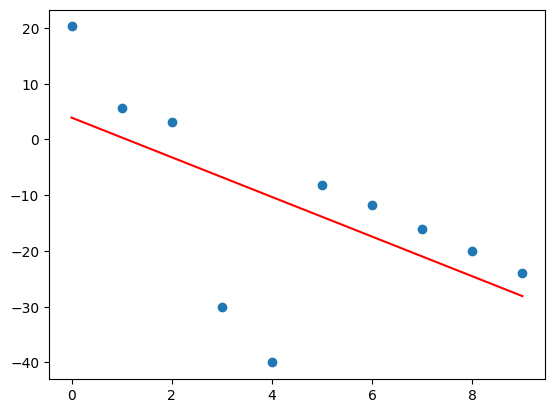

In [307]:
# Task 3.2
plt.scatter(xi, yi, label='Data Points')
regressor = LinearRegression()
regressor.fit(xi.reshape(-1, 1), yi)
y_predicts = regressor.predict(xi.reshape(-1, 1))
plt.plot(xi.reshape(-1, 1), y_predicts, color = 'r')

In [308]:
# To check whether previously trained model is same as model2
print(regressor.intercept_)
print(regressor.coef_)

3.916727272727277
[-3.55727273]


In [309]:
# Task 3.3 and 3.4
# Defining model1
def model1(x):
    y = (-4*x) + 12
    return y

# Defining model2
def model2(x):
    y = (-3.55*x) + 3.91
    return y

# Defining loss function
def loss_function(model, x, y, beta=1, N=10):
    y_hat = model(x)
    diff_sq = (y - y_hat)**2
    loss = np.sum(diff_sq/(diff_sq + (beta**2)))
    loss = loss/N
    return loss

# Computing loss for each model
model1_loss = loss_function(model1, xi, yi)
model2_loss = loss_function(model2, xi, yi)

print("Loss of model1:", model1_loss)
print("Loss of model2:", model2_loss)

Loss of model1: 0.435416262490386
Loss of model2: 0.9728470518681676


In [310]:
# Task 3.5
if (model1_loss < model2_loss):
    print("Selected model is model1.")
    print("Loss for the selected model:",model1_loss)
else:
    print("Selected model is model2.")
    print("Loss for the selected model:",model2_loss)

Selected model is model1.
Loss for the selected model: 0.435416262490386


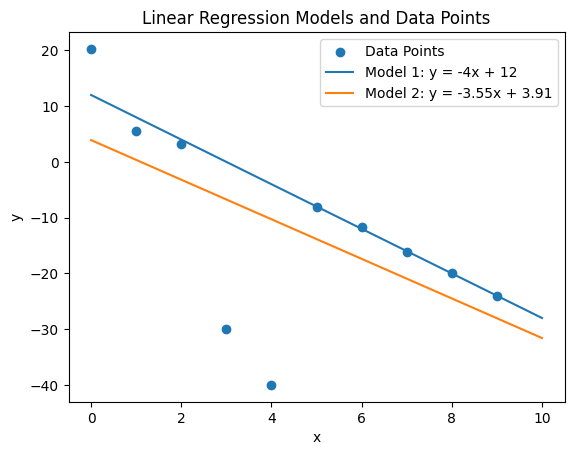

In [311]:
# Task 3.7: Plot models and data points
plt.scatter(xi, yi, label='Data Points')
x_range = np.linspace(0, 10, 100)
plt.plot(x_range, model1(x_range), label='Model 1: y = -4x + 12')
plt.plot(x_range, model2(x_range), label='Model 2: y = -3.55x + 3.91')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Linear Regression Models and Data Points')
plt.show()

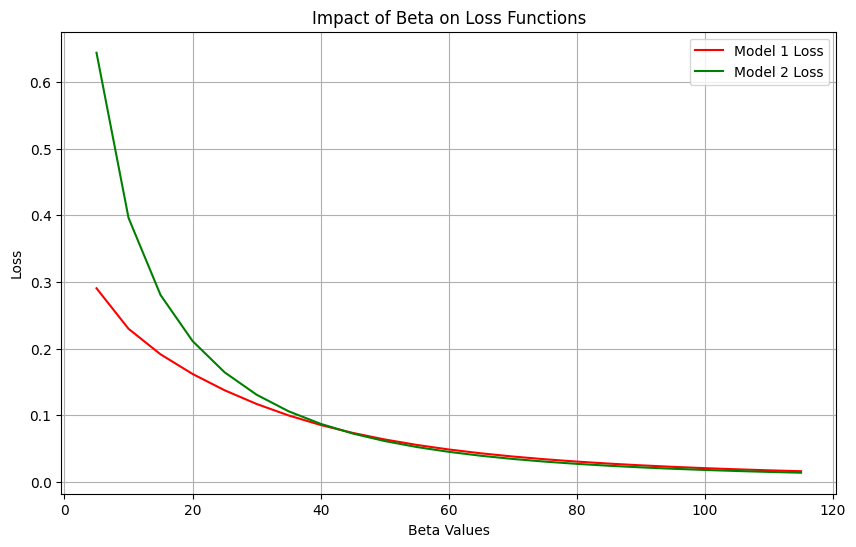

In [312]:
# Task 3.8: Checking the impact of beta
model1_array = []
model2_array = []
beta_values = range(5, 120, 5)
for beta in beta_values:
    model1_loss = loss_function(model1, xi, yi, beta)
    model2_loss = loss_function(model2, xi, yi, beta)
    model1_array.append(model1_loss)
    model2_array.append(model2_loss)

# Plot the loss values against beta values
plt.figure(figsize=(10, 6))
plt.plot(beta_values, model1_array, label='Model 1 Loss', color = 'r')
plt.plot(beta_values, model2_array, label='Model 2 Loss', color = 'g')
plt.xlabel('Beta Values')
plt.ylabel('Loss')
plt.title('Impact of Beta on Loss Functions')
plt.legend()
plt.grid(True)
plt.show()